partialMatch=True


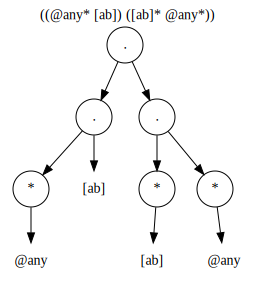

partialMatch=False


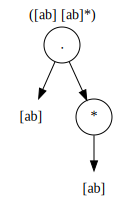

In [36]:
"""Programmer's Regular Expression Parsing into FAdo
    ^ start anchor          $ end anchor
    . any                   [xyzA-Z] character class
                            [^xyzA-Z] negated character class
    * 0 or more             + 1 or more
    {x} exactly x reps      {x,y} x to y repetitions
    {,x} at most x reps     {x,} x or more repetitions

- Anchors are replaced with @epsilon,
- if partialMatch=True and no anchor at beginning or end, then @any* added
"""

from benchmark.convert import Converter
converter = Converter()

programmersExpression = "[ab]+" # <== experiment by changing this string
re = converter.prog(programmersExpression, partialMatch=True) # default behaviour for prog(...)
print "partialMatch=True"
re.display()

re = converter.prog(programmersExpression, partialMatch=False)
print "partialMatch=False"
re.display()

partialMatch=False


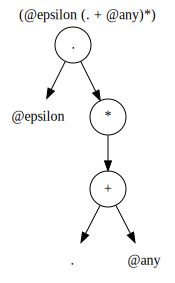

partialMatch=True


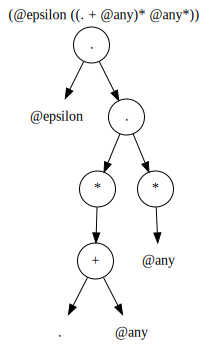

Accidentally using prog instead of math function


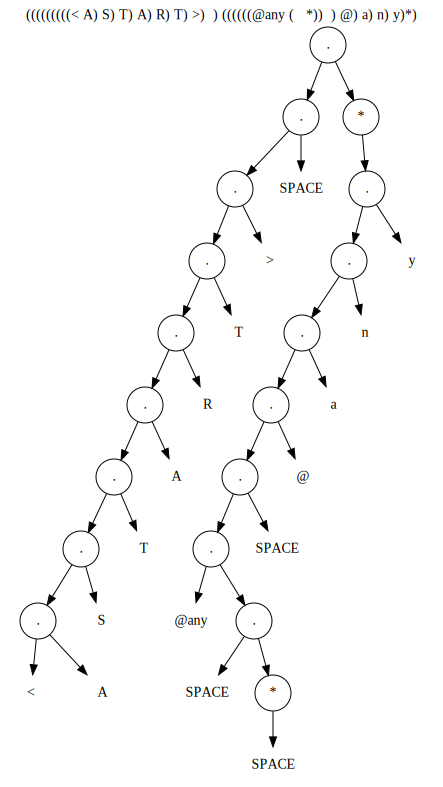

In [37]:
"""FAdoized Regular Expression.
Must follow the `benchmark/re.lark` grammar.

- You can optionally escape any symbol, you must escape []()*+ using \\
- Unicode support up to UTF-8 (where ordinals < 2**16)
"""

from benchmark.convert import Converter
converter = Converter()

fadoizedExpression = "(<ASTART> (. + @any)*)" # <== experiment by changing this string
re = converter.math(fadoizedExpression, partialMatch=False) # default behaviour for math(...)
print "partialMatch=False"
re.display()

re = converter.math(fadoizedExpression, partialMatch=True)
print "partialMatch=True"
re.display()

re = converter.prog(fadoizedExpression, partialMatch=False)
print "Accidentally using prog instead of math function"
re.display()

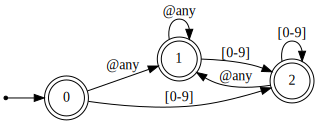

In [38]:
"""InvariantNFA's can be created directly, or more commonly constructed by using
a regular expression and the Converter.

Regular NFA's don't support the 2**16_unicode, [char classes], @any
and rely on an alphabet.
"""

from benchmark.convert import Converter
re = Converter().math("(@any + [0-9])*") # <== experiment by changing this string
infa = re.toInvariantNFA("nfaPosition") # <== experiment with: nfaPD, nfaPDO, nfaPosition, nfaFollow, nfaGlushkov, nfaThompson
infa.display()

In [39]:
"""Languages can be enumerated by the EnumInvariantNFA object."""

from benchmark.convert import Converter
enum = Converter().math("(0 + 1)*").toInvariantNFA("nfaPosition").enumNFA()

print "Enumerate the first n words"
n = 20
l = list()
for word in enum:
    l.append(word)
    if len(l) >= n: break
print "\t", l
print "\tOr equivalently:"
print "\t", list(enum.enum(n))

print "\nEnumerate all words of length 3 to 4 (inclusive)"
print "\t", list(enum.enumCrossSection(2, 3))

Enumerate the first n words
	[u'', u'0', u'1', u'00', u'01', u'10', u'11', u'000', u'001', u'010', u'011', u'100', u'101', u'110', u'111', u'0000', u'0001', u'0010', u'0011', u'0100']
	Or equivalently:
	[u'', u'0', u'1', u'00', u'01', u'10', u'11', u'000', u'001', u'010', u'011', u'100', u'101', u'110', u'111', u'0000', u'0001', u'0010', u'0011', u'0100']

Enumerate all words of length 3 to 4 (inclusive)
	[u'00', u'01', u'10', u'11', u'000', u'001', u'010', u'011', u'100', u'101', u'110', u'111']


In [40]:
"""Evaluating membership can be done in many ways:

1. regexp tree evalWordP (derivatives)
2. regexp tree evalWordPBacktrack (backtracking algorithm similar to commonly used regex engines)
3. InvariantNFA(nfaPD construction) evalWordP
4. InvariantNFA(nfaPDO construction) evalWordP
5. InvariantNFA(nfaPosition construction) evalWordP
6. InvariantNFA(nfaFollow construction) evalWordP
7. InvariantNFA(nfaGlushkov construction) evalWordP
8. InvariantNFA(nfaThompson construction) evalWordP
"""

from benchmark.convert import Converter
c = Converter()

expr = "^[xX][abcdefABCDEF0-9]+$"
accept = "x00FFE"
reject = "Xabcdef!"

re = c.prog(expr)
def infa(method):
    return str(re.toInvariantNFA(method).evalWordP(accept)) + " " + str(re.toInvariantNFA(method).evalWordP(reject))

print re.evalWordP(accept), re.evalWordP(reject)
print re.evalWordPBacktrack(accept), re.evalWordPBacktrack(reject)
print infa("nfaPD")
print infa("nfaPDO")
print infa("nfaPosition")
print infa("nfaFollow")
print infa("nfaGlushkov")
print infa("nfaThompson")

True False
True False
True False
True False
True False
True False
True False
True False


In [41]:
"""But which method evaluates the fastest using expressions used by programmers?

1. >>> make sample
    Collects regular expressions used in different languages and programs found on
    public GitHub repositories indexed by https://grep.app
2. >>> make bench
    Benchmarks the collected expressions and measures the time taken
        
        
        TODO: more details!
"""

'But which method evaluates the fastest using expressions used by programmers?\n\n1. >>> make sample\n    Collects regular expressions used in different languages and programs found on\n    public GitHub repositories indexed by https://grep.app\n2. >>> make bench\n    Benchmarks the collected expressions and measures the time taken\n        \n        \n        TODO: more details!\n'